In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [3]:
# загрузка набор данных Ирисы:
iris = datasets.load_iris()

In [4]:
iris_frame = pd.DataFrame(iris.data)
# обозначение колонок и целевых переменных
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
iris_frame['sepal square (cm**2)'] = iris_frame['sepal length (cm)'] * iris_frame['sepal width (cm)']  
iris_frame['petal square (cm**2)'] = iris_frame['petal length (cm)'] * iris_frame['petal width (cm)']  
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name,sepal square (cm**2),petal square (cm**2)
0,5.1,3.5,1.4,0.2,0,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,0,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,0,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,0,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,0,setosa,18.00,0.28


In [24]:
iris_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
sepal length (cm)       150 non-null float64
sepal width (cm)        150 non-null float64
petal length (cm)       150 non-null float64
petal width (cm)        150 non-null float64
target                  150 non-null int32
name                    150 non-null object
sepal square (cm**2)    150 non-null float64
petal square (cm**2)    150 non-null float64
dtypes: float64(6), int32(1), object(1)
memory usage: 8.9+ KB


In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
df_filter = iris_frame['target'].isin([0])
setosa_frame = iris_frame[df_filter]
setosa_frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal square (cm**2),petal square (cm**2)
count,50.00000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000,0.0,17.257800,0.365600
std,0.35249,0.379064,0.173664,0.105386,0.0,2.933775,0.181155
min,4.30000,2.300000,1.000000,0.100000,0.0,10.350000,0.110000
25%,4.80000,3.200000,1.400000,0.200000,0.0,15.040000,0.280000
50%,5.00000,3.400000,1.500000,0.200000,0.0,17.170000,0.300000
75%,5.20000,3.675000,1.575000,0.300000,0.0,19.155000,0.420000
max,5.80000,4.400000,1.900000,0.600000,0.0,25.080000,0.960000


In [22]:
df_filter = iris_frame['target'].isin([1])
versicolor_frame = iris_frame[df_filter]
versicolor_frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal square (cm**2),petal square (cm**2)
count,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000,1.0,16.526200,5.720400
std,0.516171,0.313798,0.469911,0.197753,0.0,2.866882,1.368403
min,4.900000,2.000000,3.000000,1.000000,1.0,10.000000,3.300000
25%,5.600000,2.525000,4.000000,1.200000,1.0,14.347500,4.860000
50%,5.900000,2.800000,4.350000,1.300000,1.0,16.385000,5.615000
75%,6.300000,3.000000,4.600000,1.500000,1.0,18.495000,6.750000
max,7.000000,3.400000,5.100000,1.800000,1.0,22.400000,8.640000


In [23]:
df_filter = iris_frame['target'].isin([2])
virginica_frame = iris_frame[df_filter]
virginica_frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal square (cm**2),petal square (cm**2)
count,50.00000,50.000000,50.000000,50.00000,50.0,50.000000,50.000000
mean,6.58800,2.974000,5.552000,2.02600,2.0,19.684600,11.296200
std,0.63588,0.322497,0.551895,0.27465,0.0,3.458783,2.157412
min,4.90000,2.200000,4.500000,1.40000,2.0,12.250000,7.500000
25%,6.22500,2.800000,5.100000,1.80000,2.0,17.430000,9.717500
50%,6.50000,3.000000,5.550000,2.00000,2.0,20.060000,11.445000
75%,6.90000,3.175000,5.875000,2.30000,2.0,21.412500,12.790000
max,7.90000,3.800000,6.900000,2.50000,2.0,30.020000,15.870000


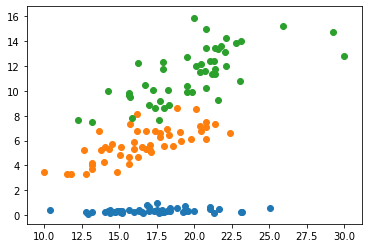

In [50]:
plt.scatter(setosa_frame['sepal square (cm**2)'], setosa_frame['petal square (cm**2)'])
plt.scatter(versicolor_frame['sepal square (cm**2)'], versicolor_frame['petal square (cm**2)'])
plt.scatter(virginica_frame['sepal square (cm**2)'], virginica_frame['petal square (cm**2)'])
plt.show()

In [52]:
X_train, X_valid, y_train, y_valid = train_test_split(
    iris_frame[['sepal square (cm**2)','petal square (cm**2)']], 
    iris_frame['target'], 
    test_size=0.25, 
    random_state=42)

scaler = RobustScaler()
cols_for_scaling = ['sepal square (cm**2)', 'petal square (cm**2)']

X_train[cols_for_scaling] = scaler.fit_transform(X_train[cols_for_scaling])
X_valid[cols_for_scaling] = scaler.transform(X_valid[cols_for_scaling])

In [53]:
X_train[cols_for_scaling].describe()

,sepal square (cm**2),petal square (cm**2)
count,1.120000e+02,112.000000
mean,1.220406e-02,0.028914
std,6.944266e-01,0.499471
min,-1.567984e+00,-0.591154
25%,-4.335557e-01,-0.557713
50%,-3.645678e-16,0.000000
75%,5.664443e-01,0.442287
max,2.384813e+00,1.042071


In [56]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)
accuracy_score(y_valid, y_pred)

1.0

In [57]:
check_test = pd.DataFrame({
    "y_valid": y_valid,
    "y_pred": y_pred,
})

check_test.head(10)

,y_valid,y_pred
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


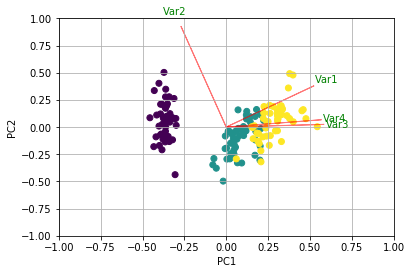

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler


iris = datasets.load_iris()
X = iris.data
y = iris.target
#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)



pca = PCA()
x_new = pca.fit_transform(X)



def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()



#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [141]:
x_new[:,0:2]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [142]:
x_new

array([[-2.26470281e+00,  4.80026597e-01, -1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01, -2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01,  4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01,  9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01,  1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00,  2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02,  3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01, -8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00,  1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01, -2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00, -2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01,  9.37592444e-02,
      

In [113]:
iris_centered = (iris.data.T[2] - iris.data.T[2].mean(), iris.data.T[3] - iris.data.T[3].mean())
m = (iris.data.T[2].mean(), iris.data.T[3].mean())
print(f'Центрированная матрица:\n{iris_centered}')
print(f'Матрица m:\n{m}')

Центрированная матрица:
(array([-2.358, -2.358, -2.458, -2.258, -2.358, -2.058, -2.358, -2.258,
       -2.358, -2.258, -2.258, -2.158, -2.358, -2.658, -2.558, -2.258,
       -2.458, -2.358, -2.058, -2.258, -2.058, -2.258, -2.758, -2.058,
       -1.858, -2.158, -2.158, -2.258, -2.358, -2.158, -2.158, -2.258,
       -2.258, -2.358, -2.258, -2.558, -2.458, -2.358, -2.458, -2.258,
       -2.458, -2.458, -2.458, -2.158, -1.858, -2.358, -2.158, -2.358,
       -2.258, -2.358,  0.942,  0.742,  1.142,  0.242,  0.842,  0.742,
        0.942, -0.458,  0.842,  0.142, -0.258,  0.442,  0.242,  0.942,
       -0.158,  0.642,  0.742,  0.342,  0.742,  0.142,  1.042,  0.242,
        1.142,  0.942,  0.542,  0.642,  1.042,  1.242,  0.742, -0.258,
        0.042, -0.058,  0.142,  1.342,  0.742,  0.742,  0.942,  0.642,
        0.342,  0.242,  0.642,  0.842,  0.242, -0.458,  0.442,  0.442,
        0.442,  0.542, -0.758,  0.342,  2.242,  1.342,  2.142,  1.842,
        2.042,  2.842,  0.742,  2.542,  2.042,  2.34

In [114]:
#Cov_matrix = np.cov(iris.data[:, :2], rowvar=False)
Cov_matrix = np.cov(iris_centered)
print(f'Ковариационная матрица:\n{Cov_matrix}')

Ковариационная матрица:
[[3.11627785 1.2956094 ]
 [1.2956094  0.58100626]]


In [115]:
U, s, W = np.linalg.svd(Cov_matrix)

# Транспонируем матрицу W
V = W.T

# s - список диагональных элементов, его нужно привести к виду диагональной матрицы для наглядности
D = np.zeros_like(Cov_matrix, dtype=float)
D[np.diag_indices(min(Cov_matrix.shape))] = s

In [116]:
print(f'Матрица D:\n{D}')

Матрица D:
[[3.66123805 0.        ]
 [0.         0.03604607]]


In [117]:
print(f'Матрица U:\n{U}')

Матрица U:
[[-0.92177769 -0.38771882]
 [-0.38771882  0.92177769]]


In [118]:
print(f'Матрица V:\n{V}')

Матрица V:
[[-0.92177769 -0.38771882]
 [-0.38771882  0.92177769]]


In [119]:
w, v = np.linalg.eig(Cov_matrix)

print(f'Ковариационная матрица:\n{Cov_matrix}')
print(f'Собственные значения:\n{w}')
print(f'Собственные векторы:\n{v}')

Ковариационная матрица:
[[3.11627785 1.2956094 ]
 [1.2956094  0.58100626]]
Собственные значения:
[3.66123805 0.03604607]
Собственные векторы:
[[ 0.92177769 -0.38771882]
 [ 0.38771882  0.92177769]]


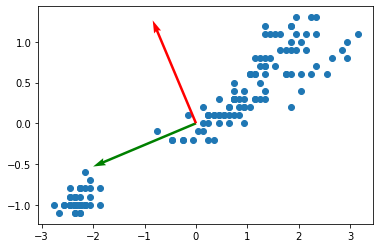

In [120]:
#plt.scatter(iris.data.T[0], iris.data.T[1])
plt.scatter(iris_centered[0], iris_centered[1])
origin = [0],[0]
plt.quiver(*origin, U[:,0], U[:,1], color = ['g','r'], scale =3)
plt.show()

In [124]:
_, vecs = np.linalg.eig(Cov_matrix)
v = -vecs[:,1]
Xnew = np.dot(v,iris_centered)
Xnew

array([ 6.92219058e-03,  6.92219058e-03, -3.18496917e-02,  4.56940728e-02,
        6.92219058e-03, -6.11177012e-02, -8.52555787e-02,  4.56940728e-02,
        6.92219058e-03,  1.37871842e-01,  4.56940728e-02,  8.44659551e-02,
        9.90999598e-02, -1.72156869e-02, -7.06215739e-02, -1.38661466e-01,
       -2.16205230e-01, -8.52555787e-02,  3.10600681e-02, -4.64836964e-02,
        1.23237837e-01, -1.38661466e-01, -1.48165338e-01, -1.53295470e-01,
        2.00781602e-01,  8.44659551e-02, -9.98895834e-02,  4.56940728e-02,
        6.92219058e-03,  8.44659551e-02,  8.44659551e-02, -1.38661466e-01,
        1.37871842e-01,  6.92219058e-03,  4.56940728e-02, -7.06215739e-02,
       -3.18496917e-02,  9.90999598e-02, -3.18496917e-02,  4.56940728e-02,
       -1.24027461e-01, -1.24027461e-01, -3.18496917e-02, -2.84245122e-01,
        1.64260633e-02, -8.52555787e-02,  8.44659551e-02,  6.92219058e-03,
        4.56940728e-02,  6.92219058e-03,  1.80261074e-01,  1.05395401e-02,
        1.65627069e-01,  

In [ ]:
#plt.scatter(iris.data.T[0], iris.data.T[1])
plt.scatter(iris_centered[0], iris_centered[1])
origin = [0],[0]
plt.quiver(*origin, U[:,0], U[:,1], color = ['g','r'], scale =3)

plt.show()

In [126]:
data = iris.data[:,:-1]
data

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.6, 1.4],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3